In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('Wine_clust.csv')

In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [57]:
data1 = data.iloc[:,[0,7]].values
data1

array([[14.23,  0.28],
       [13.2 ,  0.26],
       [13.16,  0.3 ],
       [14.37,  0.24],
       [13.24,  0.39],
       [14.2 ,  0.34],
       [14.39,  0.3 ],
       [14.06,  0.31],
       [14.83,  0.29],
       [13.86,  0.22],
       [14.1 ,  0.22],
       [14.12,  0.26],
       [13.75,  0.29],
       [14.75,  0.43],
       [14.38,  0.29],
       [13.63,  0.3 ],
       [14.3 ,  0.33],
       [13.83,  0.4 ],
       [14.19,  0.32],
       [13.64,  0.17],
       [14.06,  0.24],
       [12.93,  0.25],
       [13.71,  0.27],
       [12.85,  0.26],
       [13.5 ,  0.28],
       [13.05,  0.47],
       [13.39,  0.34],
       [13.3 ,  0.27],
       [13.87,  0.37],
       [14.02,  0.26],
       [13.73,  0.29],
       [13.58,  0.22],
       [13.68,  0.42],
       [13.76,  0.5 ],
       [13.51,  0.29],
       [13.48,  0.26],
       [13.28,  0.34],
       [13.05,  0.29],
       [13.07,  0.28],
       [14.22,  0.2 ],
       [13.56,  0.34],
       [13.41,  0.27],
       [13.88,  0.17],
       [13.

In [41]:
data1.shape

(178, 2)

In [25]:
data['Alcohol'].nunique()

126

In [58]:
data1 = data.values
type(data1)

numpy.ndarray

# Kmean clusterin

In [27]:
from sklearn.cluster import KMeans

In [59]:
wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i ,init = 'k-means++', random_state = 42)
    kmeans.fit(data1)
    wcss.append(kmeans.inertia_)

C:\Users\tompa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


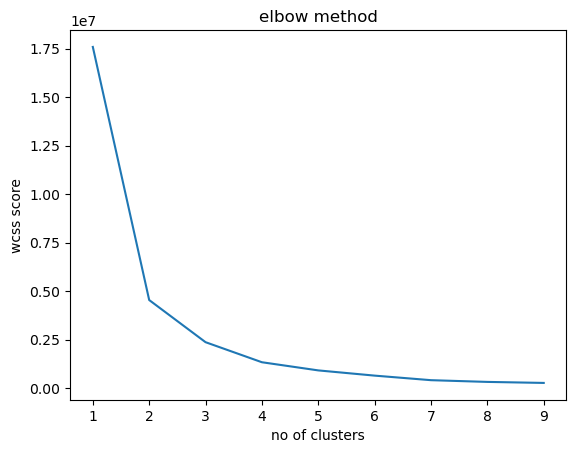

In [60]:
plt.plot(range(1,10),wcss)
plt.title('elbow method')
plt.xlabel('no of clusters')
plt.ylabel('wcss score')
plt.show()

In [17]:
#from above number of clusters is 4
#kmeans

In [69]:
kmeans = KMeans(n_clusters = 3,init = 'k-means++', random_state = 40)
y_kmeans = kmeans.fit_predict(data1)

In [71]:
y_kmeans

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [72]:
print(y_kmeans)

[1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 2 2 1 1 2 1 1 1 1 1 1 2 2
 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 0 0 2 0 0 2 2 2 0 0 1
 2 0 0 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 0 0 2 2 0 2 0 2 0 0 0 2 0 0 0 0 2 0
 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 0 0 2 2 2 2 0 0 0 2 2 0 0 2 2 0 2
 2 0 0 0 0 2 2 2 0 2 2 2 0 2 0 2 2 0 2 2 2 2 0 0 2 2 2 2 2 0]


In [88]:
from sklearn.metrics import silhouette_score
silhouette_sc=silhouette_score(data1,y_kmeans)
print(silhouette_sc)

0.571138193786884
